# ECM1416: Computational Mathematics
## Worksheet #3: Differential Equation

In [18]:
# import the numpy package in the np namespace
import numpy as np

# this line will load the plotting function into the namespace plt.
import matplotlib.pyplot as plt

# the following lines prevent Python from opening new windows for figures. 
%matplotlib inline

## Exercise
The time rate of change of a population $P(t)$ with constant birth and death rate is, in many simple cases, proportional to the size of the population. That is,

$$ \frac{dP}{dt} = kP $$

where $k$ is the constant of the net growth rate. 

Given the initial population size, $P(0) = 100$, and the net growth rate, $k = 0.1$, 

1) write a program to solve the equation numerically (using Euler's method) to obtain the approximated solution.

2) Plot figures to compare the numerical results to the analytical (exact) results over a time period of 20, considering three different step sizes in Euler's method: 2, 0.5, and 0.1 (Below is an example of the figure with the step size 0.5). 

3) Observe your figures and consider whether the numerical method is accurate and how the accuracy changes with the step size.

<img src = "example_diff.png">

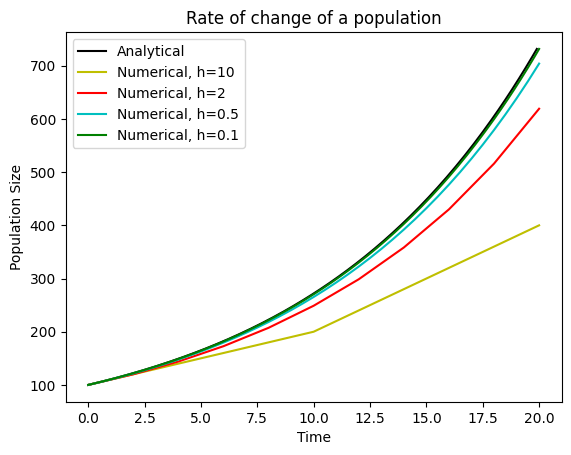

In [62]:
# Set initial conditions
k=0.1
p0=100
time_period=20

def analyitial_solution():
    '''
    Returns an array of points generated from the analytical solution with an x-axis resolution of 0.1
    '''
    # Generate x coords
    x = np.arange(0, time_period, 0.1)
    # Calculate y values and store in a list of tuples
    points = (x, p0*np.exp(k*x))
    # Return as a list of two tuples, one for x axis and one for y axis
    return [*zip(*points)]
    
def numerical_solution(h):
    '''
    Returns an array of points generated numerically with the step size as parameter h
    '''
    # Define output list
    output = []
    # Generate x coords
    x = np.arange(0, time_period+h, h)
    # Create empty array for y values
    count = int(round((time_period+h)/h))
    y = np.zeros((count,))
    # First y value is the initial p0
    y[0] = p0
    # Add this point to the output list
    output.append((x[0], y[0]))

    # For each of the x coords, find the corresponding y values
    for i, t in enumerate(x):
        # Ignore first index as it's been delt with already
        if i == 0:
            continue
        # Calculate the next y value and add it to the list of points
        y[i] = y[i-1] + (k*y[i-1])*(h)
        output.append((x[i], y[i]))

    return output

# Set the plot settings
plt.title("Rate of change of a population")
plt.xlabel("Time")
plt.ylabel("Population Size")

# Plot each of the graphs, remembering to zip and unzip the points into a tuple of x points and a tuple of y points
plt.plot(*zip(*analyitial_solution()), color='k', label='Analytical')
plt.plot(*zip(*numerical_solution(10)), color='y', label='Numerical, h=10')
plt.plot(*zip(*numerical_solution(2)), color='r', label='Numerical, h=2')
plt.plot(*zip(*numerical_solution(0.5)), color='c', label='Numerical, h=0.5')
plt.plot(*zip(*numerical_solution(0.1)), color='g', label='Numerical, h=0.1')

plt.legend()
plt.show()
